# 试卷名：全国甲卷 高考真题 【化学】学科

--------
## 题目编号：3（含图片）
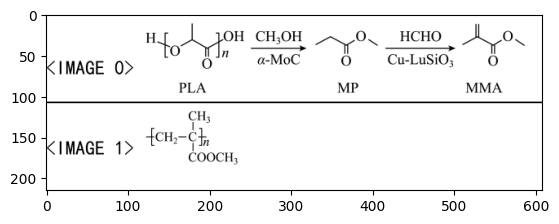
## 题目标答
C
## YI VL 34B 模型输出
C．MP的同分异构体中含羧基的有3种

--------
## 题目编号：4（含图片）
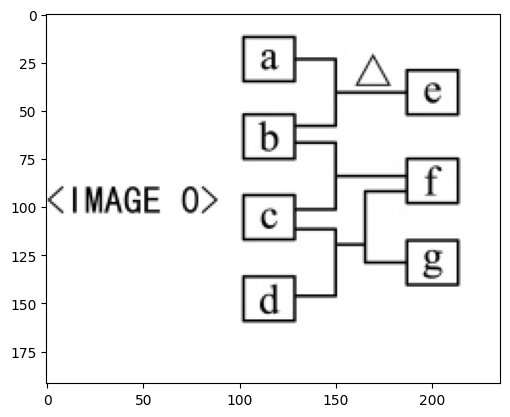
## 题目标答
B
## YI VL 34B 模型输出
A．a呈弱碱性：正确，因为a是NH4NO3，在水中会水解成NH3和NO3-，使溶液呈弱碱性。
B．f可溶于过量的b中：正确，因为f是白色沉淀，b是Na2CO3，过量的Na2CO3可以溶解f。
C．c中通入过量的e可得到无色溶液：正确，因为c是Ba(OH)2，e是CO2，过量的CO2可以与Ba(OH)2反应生成无色溶液。
D．b和d反应生成的沉淀不溶于稀硝酸：正确，因为b和d反应生成的沉淀是BaCO3，不溶于稀硝酸。

--------
## 题目编号：6（含图片）
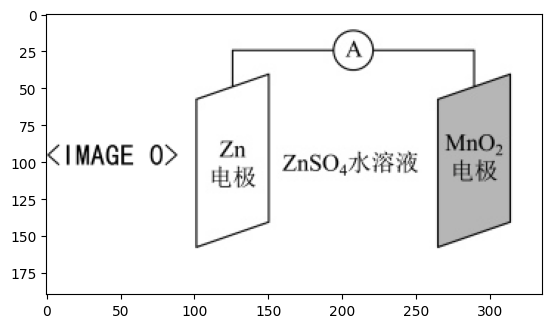
## 题目标答
C
## YI VL 34B 模型输出
A.充电时，$\mathrm{Zn}^{2+}$向阳极方向迁移

--------
## 题目编号：7（含图片）
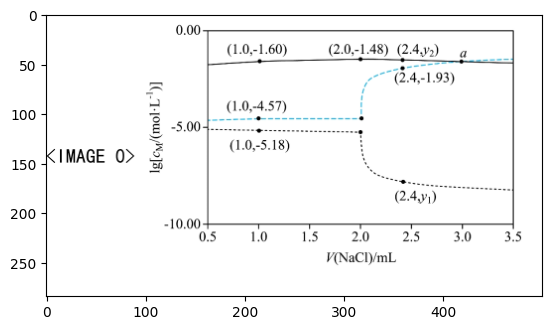
## 题目标答
D
## YI VL 34B 模型输出
正确答案是B．$\frac{K_\mathrm{sp}(\text{AgCl})}{K_\mathrm{sp}\left(\mathrm{Ag}_{2}\mathrm{CrO}_{4}\right)}=10^{-2.21}$。


In [2]:
import re
import json
from PIL import Image, ImageDraw, ImageFont
import urllib
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import os
from openai import OpenAI
# 首先参考https://github.com/01-ai/Yi/tree/main/VL 打开Openai API Server模式
# python openai_api.py --model-path model_path
# 然后修改base_url后运行下面的代码
client = OpenAI(
    api_key="EMPTY",
    base_url="http://127.0.0.1:8000/v1/",
)


device = torch.device("cuda")
model_path = "01-ai/Yi-VL-34B"

gen_kwargs = {"max_length": 8192, "do_sample": False}
model_name = "YI VL 34B"

试卷名：全国甲卷 高考真题 【化学】学科
***************
题目编号：3（含图片）


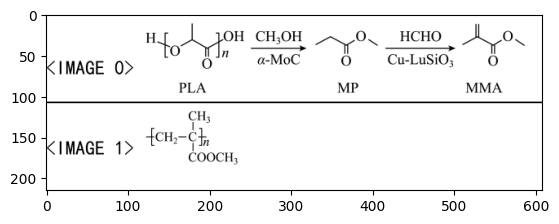

题目标答：C
YI VL 34B 模型输出：C．MP的同分异构体中含羧基的有3种
***************
题目编号：4（含图片）


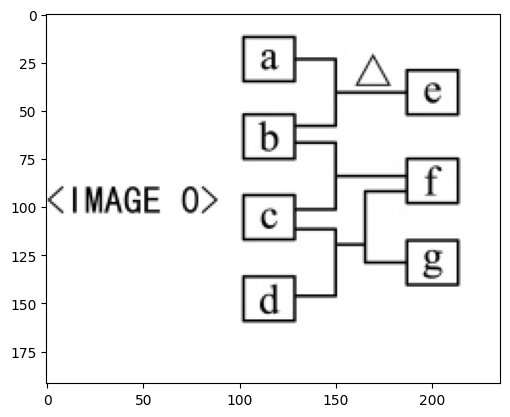

题目标答：B
YI VL 34B 模型输出：A．a呈弱碱性：正确，因为a是NH4NO3，在水中会水解成NH3和NO3-，使溶液呈弱碱性。
B．f可溶于过量的b中：正确，因为f是白色沉淀，b是Na2CO3，过量的Na2CO3可以溶解f。
C．c中通入过量的e可得到无色溶液：正确，因为c是Ba(OH)2，e是CO2，过量的CO2可以与Ba(OH)2反应生成无色溶液。
D．b和d反应生成的沉淀不溶于稀硝酸：正确，因为b和d反应生成的沉淀是BaCO3，不溶于稀硝酸。
***************
题目编号：6（含图片）


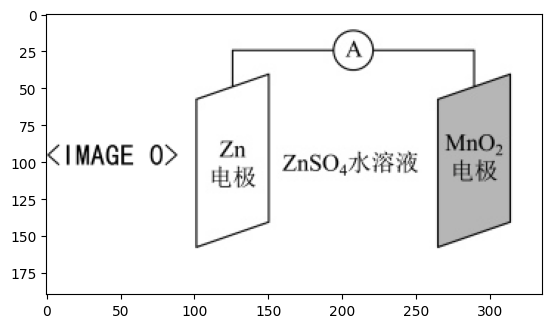

题目标答：C
YI VL 34B 模型输出：A.充电时，$\mathrm{Zn}^{2+}$向阳极方向迁移
***************
题目编号：7（含图片）


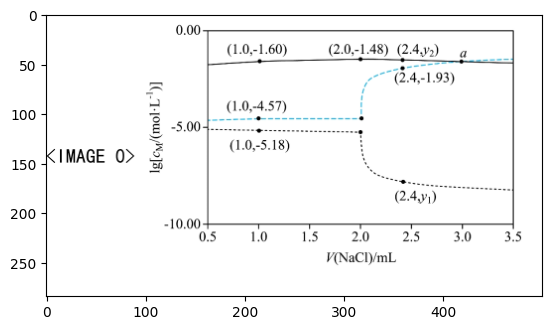

题目标答：D
YI VL 34B 模型输出：正确答案是B．$\frac{\mathrm{K}_{\mathrm{sp}}(\text{AgCl})}{\mathrm{K}_{\mathrm{sp}}\left(\mathrm{Ag}_{2}\mathrm{CrO}_{4}\right)}=10^{-2.21}$。


In [ ]:
def img_process(im_list):
    imgs = []
    for p in im_list:
        try:
            imgs.append(Image.open(p))
        except:
            return -1
    new_w = 0
    new_h = 0
    for im in imgs:
        w, h = im.size
        new_w = max(new_w, w)
        new_h += h + 20
    new_w += 20
    new_h += 20
    # new_w = max(512, new_w)
    # new_h = max(512, new_h)
    pad = max(new_w // 4, 100)
    font = ImageFont.truetype("src/fonts/SimHei font.ttf", pad // 5)
    new_img = Image.new('RGB', (new_w + pad, new_h), 'white')
    draw = ImageDraw.Draw(new_img)
    curr_h = 10
    for idx, im in enumerate(imgs):
        w, h = im.size
        if im.mode == 'RGBA':
            # 创建一个白色背景的图像
            background = Image.new('RGB', im.size, (255, 255, 255))
            background.paste(im, mask=im.split()[3])  # 使用透明度通道作为掩码
            im = background
        new_img.paste(im, (pad, curr_h))
        draw.text((0, curr_h + h // 2), f'<IMAGE {idx}>', font=font, fill='black')
        if idx + 1 < len(imgs):
            draw.line([(0, curr_h + h + 10), (new_w + pad, curr_h + h + 10)], fill='black', width=2)
        curr_h += h + 20
    return new_img


subject, paper_type = "物理", "新课标"
file_name = f"../data/{paper_type}/{subject}.jsonl"
pattern = r'<img .*?"/>'
mm_question_pattern = re.compile(pattern)
pattern = r'src=".*?"'
img_pattern =re.compile(pattern)
cache_dir = f"{os.getcwd()}/src/input/img"
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir, exist_ok=True)

questions = []

print(f"试卷名：{paper_type} 高考真题 【{subject}】学科")

with open(file_name, "r") as f:
    for idx, line in enumerate(f):
        data = json.loads(line)
        has_img, question = False, data['prompt']

        if '<img' in question:
            has_img = True
            imgs = mm_question_pattern.findall(question)
            im_list = []
            for i, img in enumerate(imgs):
                question = question.replace(img, f'<IMAGE {i}> ', 1)
                img = img_pattern.findall(img)
                assert len(img) == 1
                img = img[0].split('"')[1]
                cache_path = f"{cache_dir}/{subject}_{model_name.split()[0]}_{idx}_{i}.png"
                urllib.request.urlretrieve(img,cache_path)
                im_list.append(cache_path)
            img = img_process(im_list)
            img.save(f"{cache_dir}/{subject}_{model_name.split()[0]}_{idx}.png")
            response = client.chat.completions.create(
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {
                                "type": "text",
                                "text": f"{question}"
                            },
                            {
                                "type": "image_url",
                                "image_url": {
                                    # Either an url or a local path
                                    "url": f"{cache_dir}/{subject}_{model_name.split()[0]}_{idx}.png"
                                }
                            }
                        ]
                    }
                ],
                model="yi-vl",
                stream=False,
                temperature=0.0,
            )
            response = response.choices[0].message.content
            if idx == 0:
                print("*" * 35)
            else:
                print("*" * 15)

            print("题目编号：" + str(idx + 1) + ("（含图片）" if has_img else ""))
            plt.imshow(img)
            plt.show()
            print("题目标答：" + data["answer"])
            print(f"{model_name} 模型输出：" + response)

            questions.append({
                "id": str(idx + 1),
                "question": data['prompt'],
                "answer": data["answer"],
                "output": response,
                "has_img": has_img
            })